In [ ]:
import uproot # for reading ROOT files, in this notebook it won't be used but it is still very useful for many analyses
import numpy as np
import importlib
from scipy.special import erf
import basicfunc as bf

importlib.reload(bf) #This is needed to reload the basicfunc.py library without reloading the kernel. If you don't make any modification to the basicfunc.py file it is not necessary

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\libreria\\basicfunc.py'>

In [ ]:
# In questi esempi non viene mai usato il "save" con cui i grafici vengono salvati in una cartella chiamata "plots" (che viene creata se non esiste già)
#     per salvare i grafici basta aggiungere save=True alla funzione che crea il grafico.
#     Ad esempio la prima funzione (normal) diventa: bf.normal(data=data, xlabel="x", ylabel="Counts", titolo="Gaussian fit", n=1, plot=True, save=True)

# Se volete leggere file ROOT, dovete installare uproot. Per farlo basta scrivere in un terminale: "pip install uproot" 
#    Poi per aprire il file ROOT dovete usare il comando: file = uproot.open("nomefile.root") e da quel momento userete il file come un dizionario.
#    In particolare con file.keys() potete vedere le chiavi del dizionario e con file["chiave"].keys() potete vedere le chiavi del dizionario 
#    che si trova all'interno della chiave "chiave".
#    In ogni caso queste cose ve le spiega meglio di me ChatGPT, quindi non mi dilungo.

#######################################################################################################################################################

# In these examples, the "save" option is never used, which allows the plots to be saved in a folder called "plots" (created automatically if it doesn't already exist).
#   To save the plots, just add save=True to the function that generates the plot.
#   For example, the first function (normal) becomes:
#   bf.normal(data=data, xlabel="x", ylabel="Counts", title="Gaussian fit", n=1, plot=True, save=True)

# If you want to read ROOT files, you need to install uproot. To do this, simply type "pip install uproot" in a terminal.
#    Then, to open a ROOT file, use the command: file = uproot.open("filename.root"), and from that point on you can use the file as a dictionary.
#   In particular, with file.keys() you can view the dictionary keys, and with file["key"].keys() you can see the keys of the dictionary
#   that is stored within the "key" entry.
#   In any case, ChatGPT can explain this better than I can, so I won’t go into more detail.

'Se volete leggere file ROOT, dovete installare uproot. Per farlo basta scrivere in un terminale: "pip install uproot" '

# 'normal' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 
- The integral of the histogram in the range mu ± n*sigma
- The plot data (x_fit, y_fit, bin_centers, counts) if you need to plot other thing

Integrale dell'istogramma nel range [-1.0197346459864116, 0.8748467650771387] = 315 ± 17


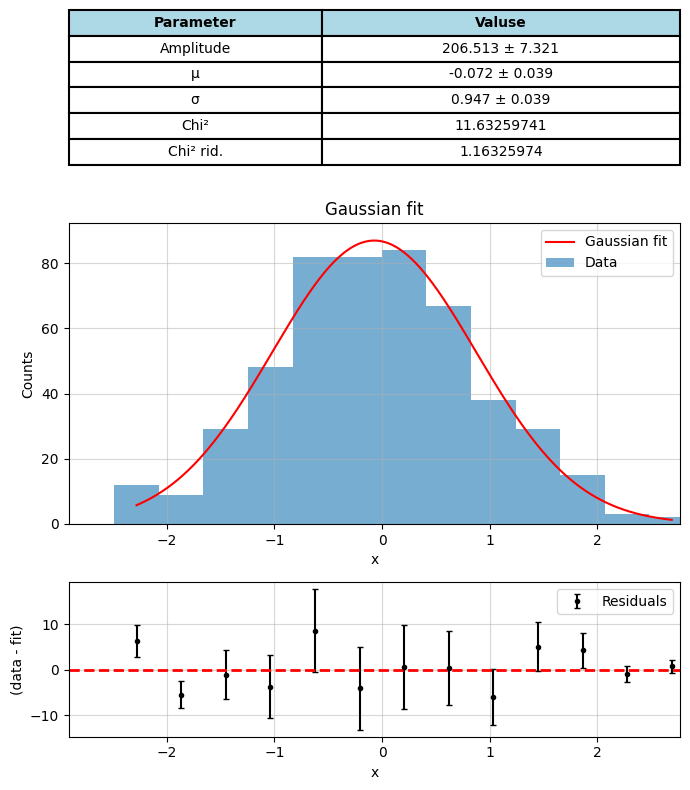

In [ ]:
# Data generation 
data = np.random.normal(loc=0, scale=1, size=500)

# Test of the normal fit function
ex_normal = bf.normal(data=data, xlabel="x", ylabel="Counts", titolo="Gaussian fit", n=1, plot=True)


# 'compton' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 
- The integral of the histogram in the range mu ± n*sigma
- The plot data (x_fit, y_fit, bin_centers, counts) if you need to plot other thing

Integral within [443.9334120701607, 557.8368832534564] = 2421 ± 49


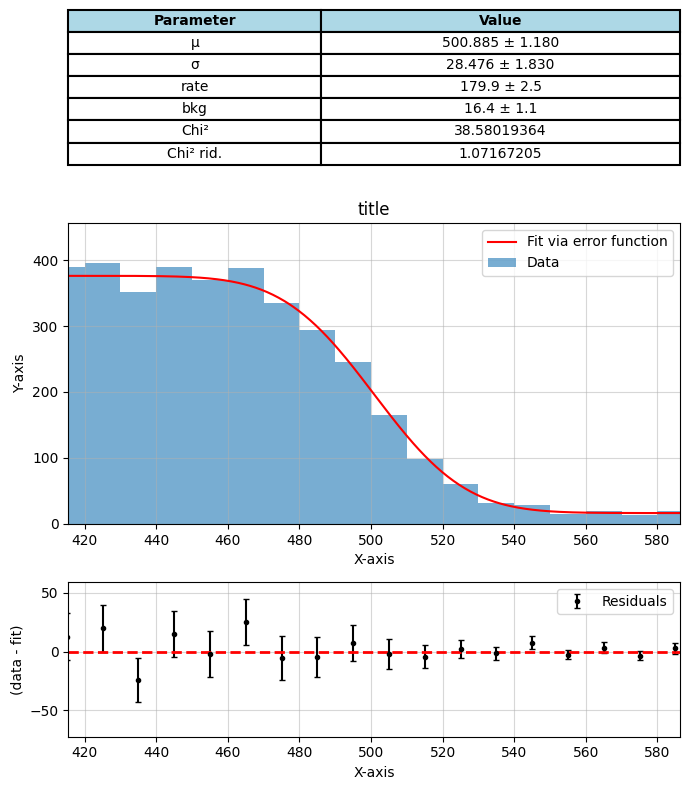

In [3]:
# Edge parameters
mu = 500
sigma = 20
rate = 1000
bkg = 50
x = np.linspace(0, 1000, 2000)
# Data generation with the erfc function
y_clean = rate * (1 - 0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2))))) + bkg
# Data generation with some noise
probability_distribution = y_clean / np.sum(y_clean)
prova = np.random.choice(x, size=20000, p=probability_distribution)

# Test of the compton fit function
ex_compton = bf.compton(data=prova, b=100, xmin=300, xmax=700, n=2, plot=True)

# 'linear' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
m = 2.5330090288426623 ± 0.012234271817823295
q = 0.6935920368314481 ± 0.07124092007782204
Chi-squared = 2599.893660881371
Reduced chi-squared = 92.85334503147753


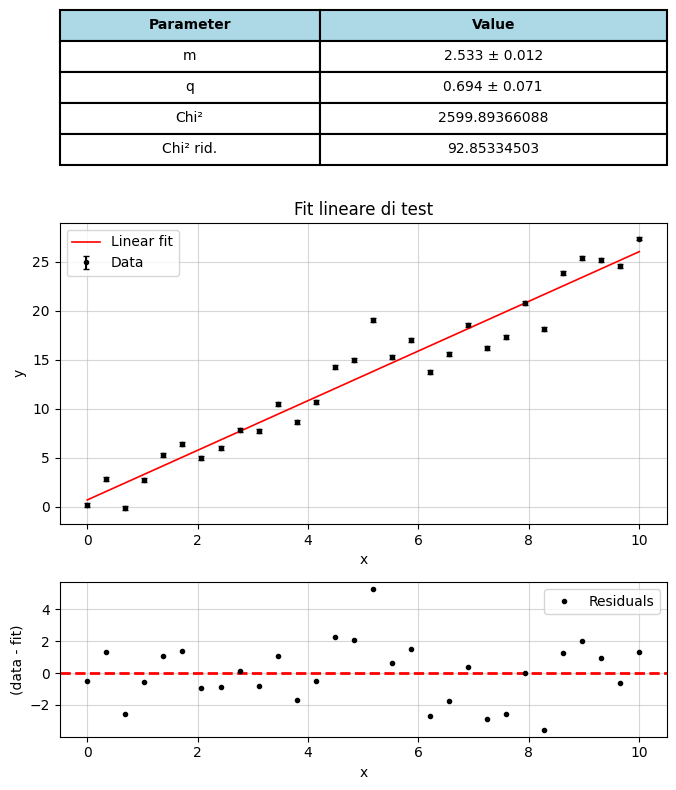

In [4]:
# Parameters
m_true = 2.5
q_true = 1.0

# Data generation with high noise level
x = np.linspace(0, 10, 30)
y_clean = m_true * x + q_true
rumore = np.random.normal(0, 2.0, size=x.size)
y = y_clean + rumore
# Errori fittizi (sy) per simulare incertezza nella misura
sy = np.full_like(x, 0.2) # constant y error
sx = np.zeros_like(x)     # no x error

# Test of the linear fit function
ex_linear = bf.linear(x, y, sx=sx, sy=sy, xlabel="x", ylabel="y", titolo="Fit lineare di test", plot=True)

# 'exponential' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
A = 1.9781988597930735 ± 1.14684782227601
tau = 932.0520633906599 ± 1505.7232901531677
f0 = 0.00901793095945997 ± 1.0695749784240103
Chi-squared = 0.0008834851009368481
Reduced Chi-squared = 0.00017669702018736962


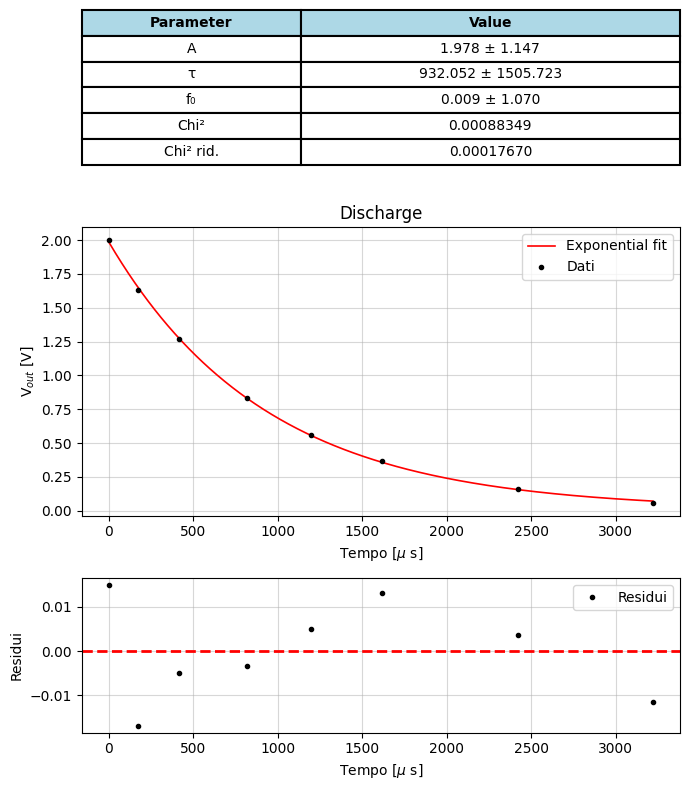

In [5]:
# Fake data of a discharge curve
x = np.array([1, 176, 416, 816, 1200, 1620, 2420, 3220]) #microseconds
y = np.array([2.00, 1.63, 1.27, 0.83, 0.56, 0.37, 0.16, 0.06]) #volt

#Test of the exponential fit function
caduta_Rsimulazione = bf.exponential(x, y, xlabel=r'Tempo [$\mu$ s]', ylabel=r'V$_{out}$ [V]', titolo=r'Discharge', plot=True)

# 'parabolic' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
a = 5.036429039965299 ± 0.0005560324717723014
b = 0.8853739929708434 ± 0.019724100474035267
c = -1.835535389655593 ± 0.30126934810911116
Chi-squared = 10064.705329550578
Reduced chi-squared = 592.0414899735633


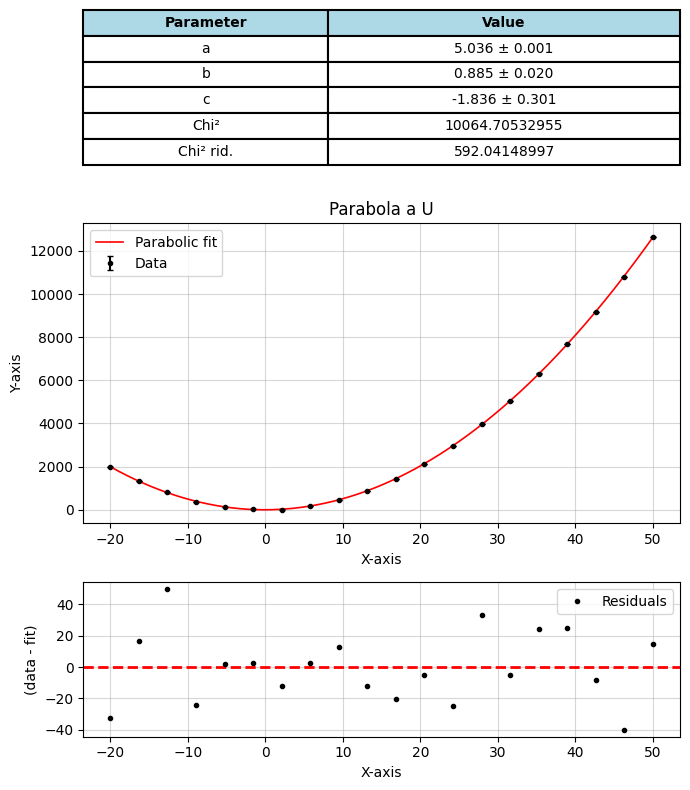

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
a = -0.40947265058228777 ± 0.00042571055225484633
b = 1.8107351754904126 ± 0.012542457204805572
c = 4.3937690548520445 ± 0.31922076822300455
Chi-squared = 9117.770771037196
Reduced chi-squared = 536.3394571198351


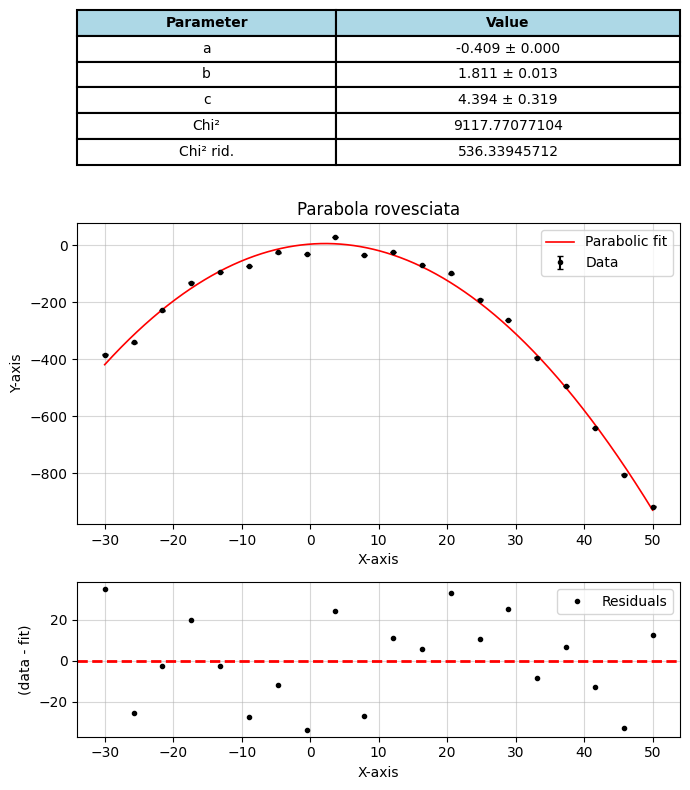

In [6]:
# Simulated data for an u parabola
x_u = np.linspace(-20, 50, 20)
true_y_u = 5 * x_u**2 + 2 * x_u + 3
noise_u = np.random.normal(0, 25, size=x_u.size)
y_u = true_y_u + noise_u
sy_u = np.full_like(y_u, 1.0)  # incertezza costante
sx_u = np.zeros_like(x_u)     # nessuna incertezza sull'x

# Test of the parabolic fit function for u parabola
params_u = bf.parabolic(x_u, y_u, sx=sx_u, sy=sy_u, titolo="Parabola a U", plot=True)


# Simulated data for an inverted parabola
x_n = np.linspace(-30, 50, 20)
true_y_n = -0.4 * x_n**2 + 1.5 * x_n + 10
noise_n = np.random.normal(0, 25, size=x_n.size)
y_n = true_y_n + noise_n
sy_n = np.full_like(y_n, 1.0)
sx_n = np.zeros_like(x_n)

# test of the parabolic fit function for inverted parabola
params_n = bf.parabolic(x_n, y_n, sx=sx_n, sy=sy_n, titolo="Parabola rovesciata", plot=True)

# 'lorentzian' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
A = 7.994469157895751 ± 0.14278668253967353
gamma = -2.447821917222205 ± 0.06385883204601392
x0 = 3.926415157002894 ± 0.021706714007211407
Chi-squared = 179.61524813086334
Reduced Chi-squared = 6.652416597439383


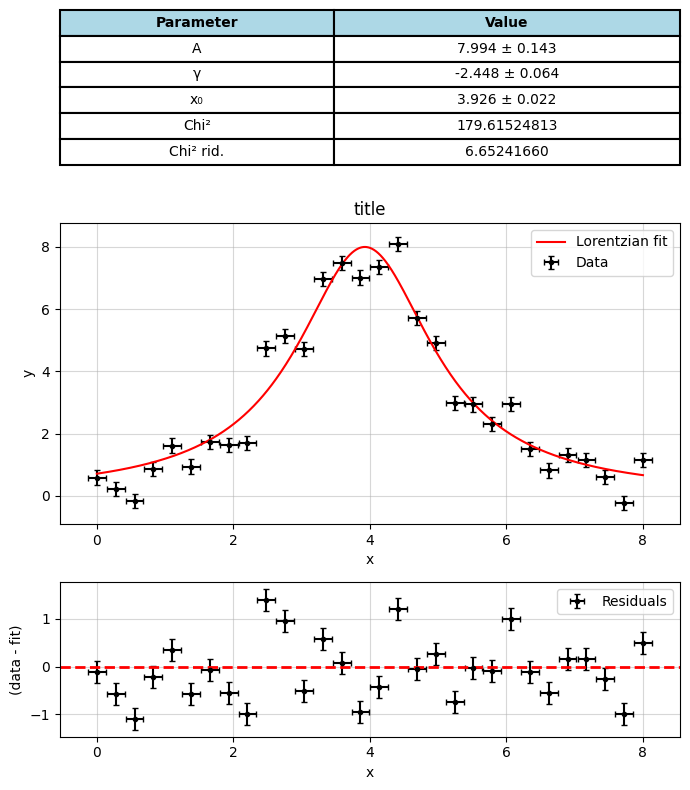

In [7]:
# Lorentzian function (equivalente a Breit-Wigner con a/π e FWHM)
def lorentz(x, A, gamma, x0):
    return A * (gamma**2) / ((x - x0)**2 + gamma**2)

# Parametri reali (per generare dati fittizi)
A_true = 8
gamma_true = 1.2
x0_true = 4.0

# Generazione dati
x = np.linspace(0, 8, 30)
y_clean = lorentz(x, A_true, gamma_true, x0_true)
noise = np.random.normal(0, 0.7, size=x.shape)
y = y_clean + noise

# Errori simulati
sy = np.full_like(y, 0.23)
sx = np.full_like(x, 0.13)

# Test of the Lorentzian fit function
ex_lorentz = bf.lorentzian(x, y, sx=sx, sy=sy, xlabel="x", ylabel="y", plot=True)

# 'wigner' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Optimised parameters
-----------------------------------------------
a = 41.605847090189016 ± 0.399242130783544
gamma = 16.323866846377484 ± 0.22231612116567157
x0 = 24.746622017303736 ± 0.07503126566723123
Chi-squared = 282.92361111862596
Reduced Chi-squared = 10.478652263652814


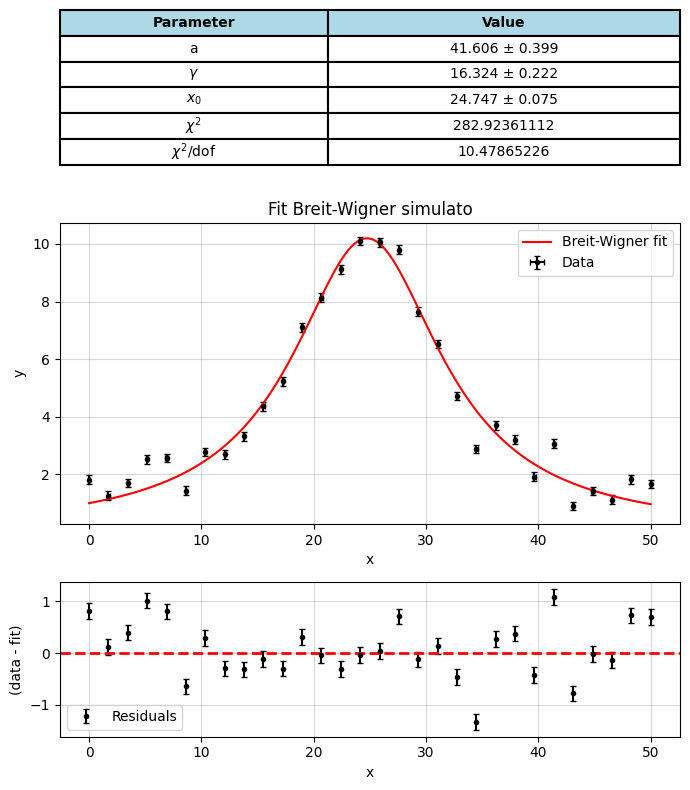

In [8]:
# Breit-Wigner definitio for the generation of the fake data
def wigner(x, a, gamma, x0):
    return a * gamma**2 / ((x - x0)**2 + gamma**2)

# Real parameters (to generate synthetic data)
a_true = 10
gamma_true = 8
x0_true = 25.0

# Data generation with noise
np.random.seed(0)
x = np.linspace(0, 50, 30)
y_clean = wigner(x, a_true, gamma_true, x0_true)
noise = np.random.normal(0, 0.5, size=x.shape)
y = y_clean + noise

# Simulated errors
sy = np.full_like(y, 0.15)
sx = np.full_like(x, 0.1)

# Test of the Breit-Wigner fit function
prova_breit = bf.breitwigner(x, y, sx=sx, sy=sy, xlabel="x", ylabel="y", titolo="Fit Breit-Wigner simulato", plot=True)

# 'lognormal' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 
- The integral of the histogram in the range mu ± n*sigma
- The plot data (x_fit, y_fit, bin_centers, counts) if you need to plot other thing

Optimised parameters
-----------------------------------------------
Amplitude = 194.06366135374188 ± 7.424658372028954
Mean = 1.1991789001102249 ± 0.026841787057193655
Sigma = 0.6043344730486312 ± 0.028335010901200466
Chi-squared = 24.193295270375522
Reduced chi-squared = 0.7560404771992351
Integral within 1σ: 665 ± 25


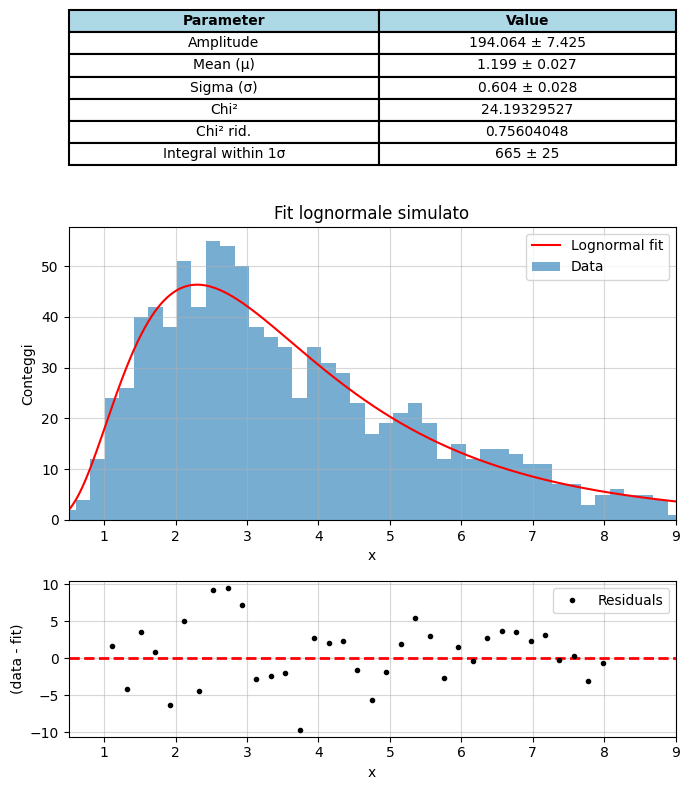

In [9]:
from scipy.stats import lognorm

# Beginning lognormal distribution parameters
s = 0.6                    
mu = 1.2                   
scale = np.exp(mu)         
ampiezza = 1000            
n_bins = 50                

# Bin Generation
x = np.linspace(0.1, 10, n_bins)
bin_width = x[1] - x[0]

# Theoretical lognormal distribution
y_teorica = ampiezza * lognorm.pdf(x, s=s, scale=scale) * bin_width

# Noise addition
y_rumorosa = np.random.poisson(y_teorica)

# Test of the lognormal fit function
ex_lognormal = bf.lognormal(bin_centers=x, counts=y_rumorosa, xlabel="x", ylabel="Conteggi", titolo="Fit lognormale simulato", xmin=1, xmax=8, x1=0.5, x2=9, n=1, plot=True)

# 'bode' function


Optimised parameters
--------------------------------------------------
Cutoff frequency (f_cut) = 5290.354 ± 71.176
Chi-squared = 0.0344
Reduced chi-squared = 0.0029


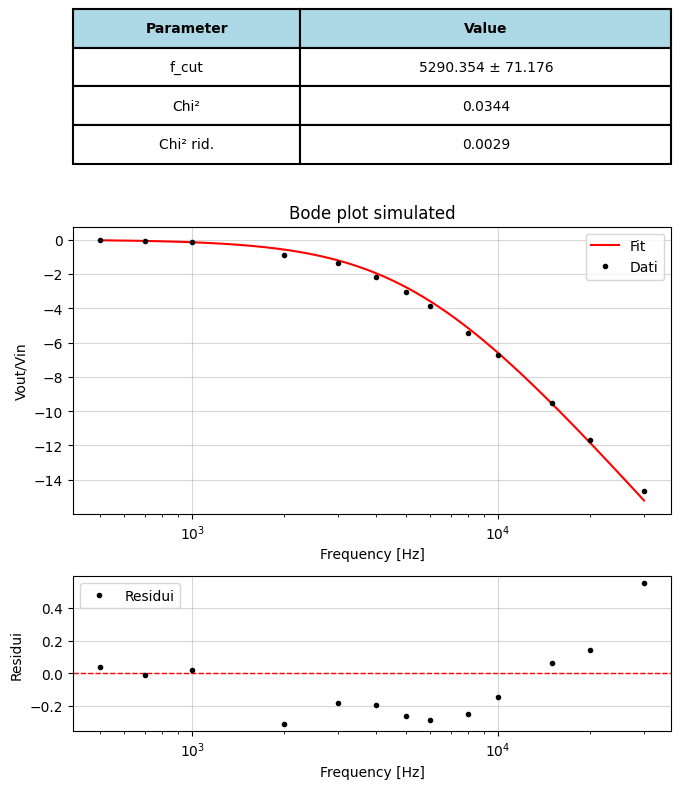


Optimised parameters
--------------------------------------------------
Cutoff frequency (f_cut) = 5128.409 ± 80.382
Chi-squared = 0.0471
Reduced chi-squared = 0.0043


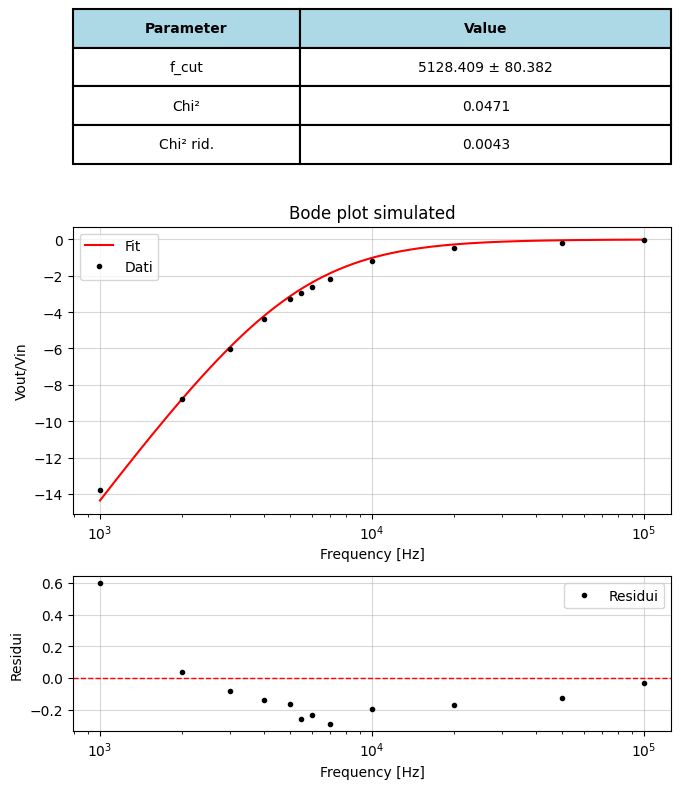

c:\Users\Utente\Desktop\libreria\basicfunc.py:1248: RuntimeWarning: invalid value encountered in log10
  return 20 * np.log10(A * (f * gamma) / np.sqrt((f**2 - f0**2)**2 + (f * gamma)**2))



Optimised parameters
--------------------------------------------------
Resonant frequency (f₀) = 4311.392 ± 197.846
Gamma (Γ) = 2918.159 ± 463.111
Amplitude (A) = 0.544 ± 0.062
Chi-squared = 0.3499
Reduced chi-squared = 0.0292


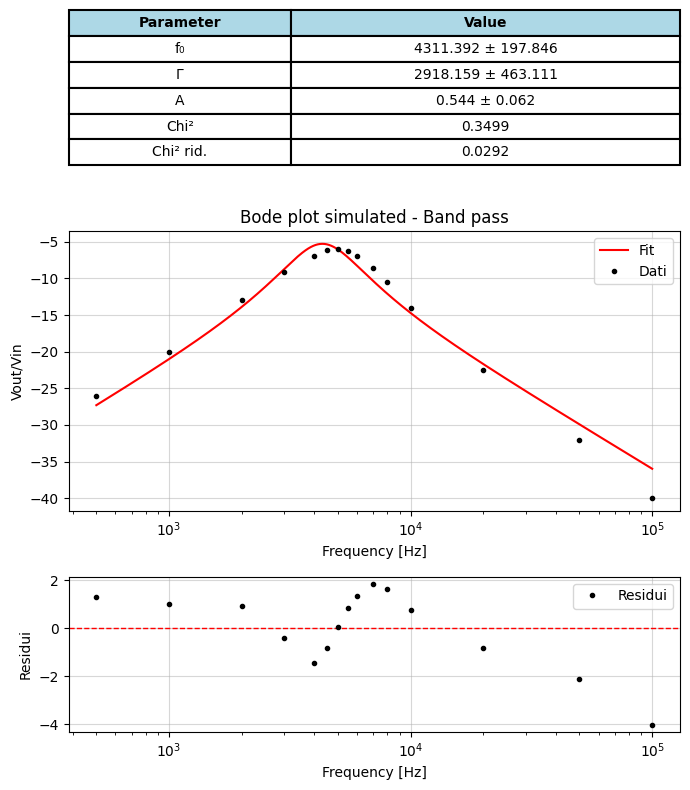

In [10]:
#low pass filter
f_low = np.array([30000, 20000, 15000, 10000, 8000, 6000, 5000, 4000, 3000, 2000, 1000, 700, 500 ])
vout_low = np.array([0.37, 0.52, 0.67, 0.92, 1.072, 1.28, 1.41, 1.56, 1.704, 1.805, 1.97, 1.98, 2.00])
vin_low = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
#test of the bode function fon a low pass filter
ex_bode_low = bf.bode(f_low, out_=vout_low, in_=vin_low, tipo="low", xlabel="Frequency [Hz]", ylabel="Vout/Vin", titolo="Bode plot simulated", plot=True)

#high pass filter
f_high = np.array([100000, 50000, 20000, 10000, 7000, 6000, 5500, 5000, 4000, 3000, 2000, 1000])
vin_high = np.array([2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])
vout_high = np.array([1.99, 1.96, 1.90, 1.74, 1.56, 1.48, 1.42, 1.37, 1.21, 1.00, 0.73, 0.41])
#test of the bode function fon an high pass filter
ex_bode_high = bf.bode(f_high, out_=vout_high, in_=vin_high, tipo="high", xlabel="Frequency [Hz]", ylabel="Vout/Vin", titolo="Bode plot simulated", plot=True)

#band pass filter
f_band = np.array([500, 1000, 2000, 3000, 4000, 4500, 5000, 5500, 6000, 7000, 8000, 10000, 20000, 50000, 100000])
vin_band = np.full_like(f_band, 2.0)
vout_band = np.array([0.10, 0.20, 0.45, 0.70, 0.90, 0.98, 1.00, 0.97, 0.90, 0.75, 0.60, 0.40, 0.15, 0.05, 0.02])

# Test of the bode function for a band pass filter
ex_bode_band = bf.bode( f_band, out_=vout_band, in_=vin_band, tipo="band", xlabel="Frequency [Hz]", ylabel="Vout/Vin", titolo="Bode plot simulated - Band pass", plot=True)